<a href="https://colab.research.google.com/github/nikeshthapa255/AI-MLOPS/blob/main/Employee_Attrition_Prediction_Boosted_Trees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Advanced Certification Programme in AI and MLOps
## A programme by IISc and TalentSprint
### Mini Project Notebook: Employee Attrition Prediction

## Problem Statement

To predict employee attrition using CatBoost and XgBoost

## Learning Objectives

At the end of the experiment, you will be able to

* explore the employee attrition dataset
* apply CatBoost and XgBoost on the dataset
* tune the model hyperparameters to improve accuracy
* evaluate the model using suitable metrics


## Introduction

Employee attrition is the gradual reduction in employee numbers. Employee attrition happens when the size of your workforce diminishes over time. This means that employees are leaving faster than they are hired. Employee attrition happens when employees retire, resign, or simply aren't replaced.
Although employee attrition can be company-wide, it may also be confined to specific parts of a business.

Employee attrition can happen for several reasons. These include unhappiness about employee benefits or the pay structure, a lack of employee development opportunities, and even poor conditions in the workplace.

To know more about the factors that lead to employee attrition, refer [here](https://www.betterup.com/blog/employee-attrition#:~:text=Employee%20attrition%20is%20the%20gradual,or%20simply%20aren't%20replaced).


**Gradient Boosted Decision Trees**

* Gradient boosted decision trees (GBDTs) are one of the most important machine learning models.

* GBDTs originate from AdaBoost, an algorithm that ensembles weak learners and uses the majority vote, weighted by their individual accuracy, to solve binary classification problems. The weak learners in this case are decision trees with a single split, called decision stumps.

* Some of the widely used gradient boosted decision trees are XgBoost, CatBoost and LightGBM.

## Dataset

The dataset used for this mini-project is [HR Employee Attrition dataset](https://data.world/aaizemberg/hr-employee-attrition). This dataset is synthetically created by IBM data scientists. There are 35 features and 1470 records.

There are numerical features such as:

* Age
* DistanceFromHome
* EmployeeNumber
* PerformanceRating

There are several categorical features such as:
* JobRole
* EducationField
* Department
* BusinessTravel

Dependent or target feature is 'attrition' which has values as Yes/No.

In [ ]:
#@title Download the data
!wget -qq https://cdn.iisc.talentsprint.com/CDS/Datasets/wa_fn_usec_hr_employee_attrition_tsv.csv
print("Data Downloaded Successfuly!!")

Data Downloaded Successfuly!!


## Grading = 10 Points

### Install Required Dependencies

In [ ]:
# Install CatBoost
!pip -qq install catboost
!pip -qq install lightgbm
!pip -qq install xgboost

# hyper parameter tuning
!pip install hyperopt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 11.2 MB/s eta 0:00:00


### Import Required Packages

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix, f1_score
from sklearn.model_selection import train_test_split
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier, metrics
import warnings
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
pd.set_option('display.max_columns', 100)
%matplotlib inline

Please refer to the [ReadMe](https://drive.google.com/file/d/1V5CAUlRwLNcQcIWfgCJhukYvRESi2cC2/view?usp=sharing) before proceeding further.

# Part-A

## Load the Dataset

**Exercise 1: Read the dataset [0.5 Mark]**

**Hint:** pd.read_csv()

In [ ]:
# read the dataset
# YOUR CODE HERE
df = pd.read_csv("/content/wa_fn_usec_hr_employee_attrition_tsv.csv")
df

,age,attrition,businesstravel,dailyrate,department,distancefromhome,education,educationfield,employeecount,employeenumber,environmentsatisfaction,gender,hourlyrate,jobinvolvement,joblevel,jobrole,jobsatisfaction,maritalstatus,monthlyincome,monthlyrate,numcompaniesworked,over18,overtime,percentsalaryhike,performancerating,relationshipsatisfaction,standardhours,stockoptionlevel,totalworkingyears,trainingtimeslastyear,worklifebalance,yearsatcompany,yearsincurrentrole,yearssincelastpromotion,yearswithcurrmanager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,3,Male,41,4,2,Laboratory Technician,4,Married,2571,12290,4,Y,No,17,3,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,4,Male,42,2,3,Healthcare Representative,1,Married,9991,21457,4,Y,No,15,3,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,2,Male,87,4,2,Manufacturing Director,2,Married,6142,5174,1,Y,Yes,20,4,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,4,Male,63,2,2,Sales Executive,2,Married,5390,13243,2,Y,No,14,3,4,80,0,17,3,2,9,6,0,8


In [ ]:
# Check the shape of dataframe.
# YOUR CODE HERE
df.shape

(1470, 35)

## Data Exploration

- Check for missing values
- Check for features having consistent data across samples
- Check for outliers or inconsistencies in data columns
- Check for correlated features
- Do we have a target label imbalance
- How our independent variables are distributed relative to our target label
- Are there features that have strong linear or monotonic relationships? Making correlation heatmaps makes it easy to identify possible collinearity

**Exercise 2: Create a `List` of numerical and categorical columns. Display a statistical description of the dataset. Remove missing values (if any) [0.5 Mark]**

**Hint:**
>Use `for` to iterate through each column.

>For statistical description display - samples count, missing values count, range, and data type of each feature.

In [ ]:
# YOUR CODE HERE

#print("Sample Count:\n\n", df.shape[0] )

print("Datatype of each feature :\n\n",df.info())
print("Statistical Data : \n", df.describe())
df = df.drop(['employeecount','standardhours','over18',
              'performancerating'
              ], axis=1)
numerical_features = []
categorical_features = []
for column in df.columns:
    if column == 'attrition':
        continue
    if df[column].dtype in ['int64', 'float64'] and df[column].nunique() >5 :
        numerical_features.append(column)
    else:
        categorical_features.append(column)
print("Numerical Features:", numerical_features)
print("Categorical Features:", categorical_features)
print('------------------------------------------')

df = df.dropna()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   age                       1470 non-null   int64 
 1   attrition                 1470 non-null   object
 2   businesstravel            1470 non-null   object
 3   dailyrate                 1470 non-null   int64 
 4   department                1470 non-null   object
 5   distancefromhome          1470 non-null   int64 
 6   education                 1470 non-null   int64 
 7   educationfield            1470 non-null   object
 8   employeecount             1470 non-null   int64 
 9   employeenumber            1470 non-null   int64 
 10  environmentsatisfaction   1470 non-null   int64 
 11  gender                    1470 non-null   object
 12  hourlyrate                1470 non-null   int64 
 13  jobinvolvement            1470 non-null   int64 
 14  joblevel                

First, we want to get a sense of our data:
- What features have the most divergent distributions based on target class
- Do we have a target label imbalance
- How our independent variables are distributed relative to our target label
- Are there features that have strong linear or monotonic relationships, making correlation heatmaps makes it easy to identify possible colinearity

### Check for outliers

**Exercise 3: Create a box plot to check for outliers [0.5 Mark]**

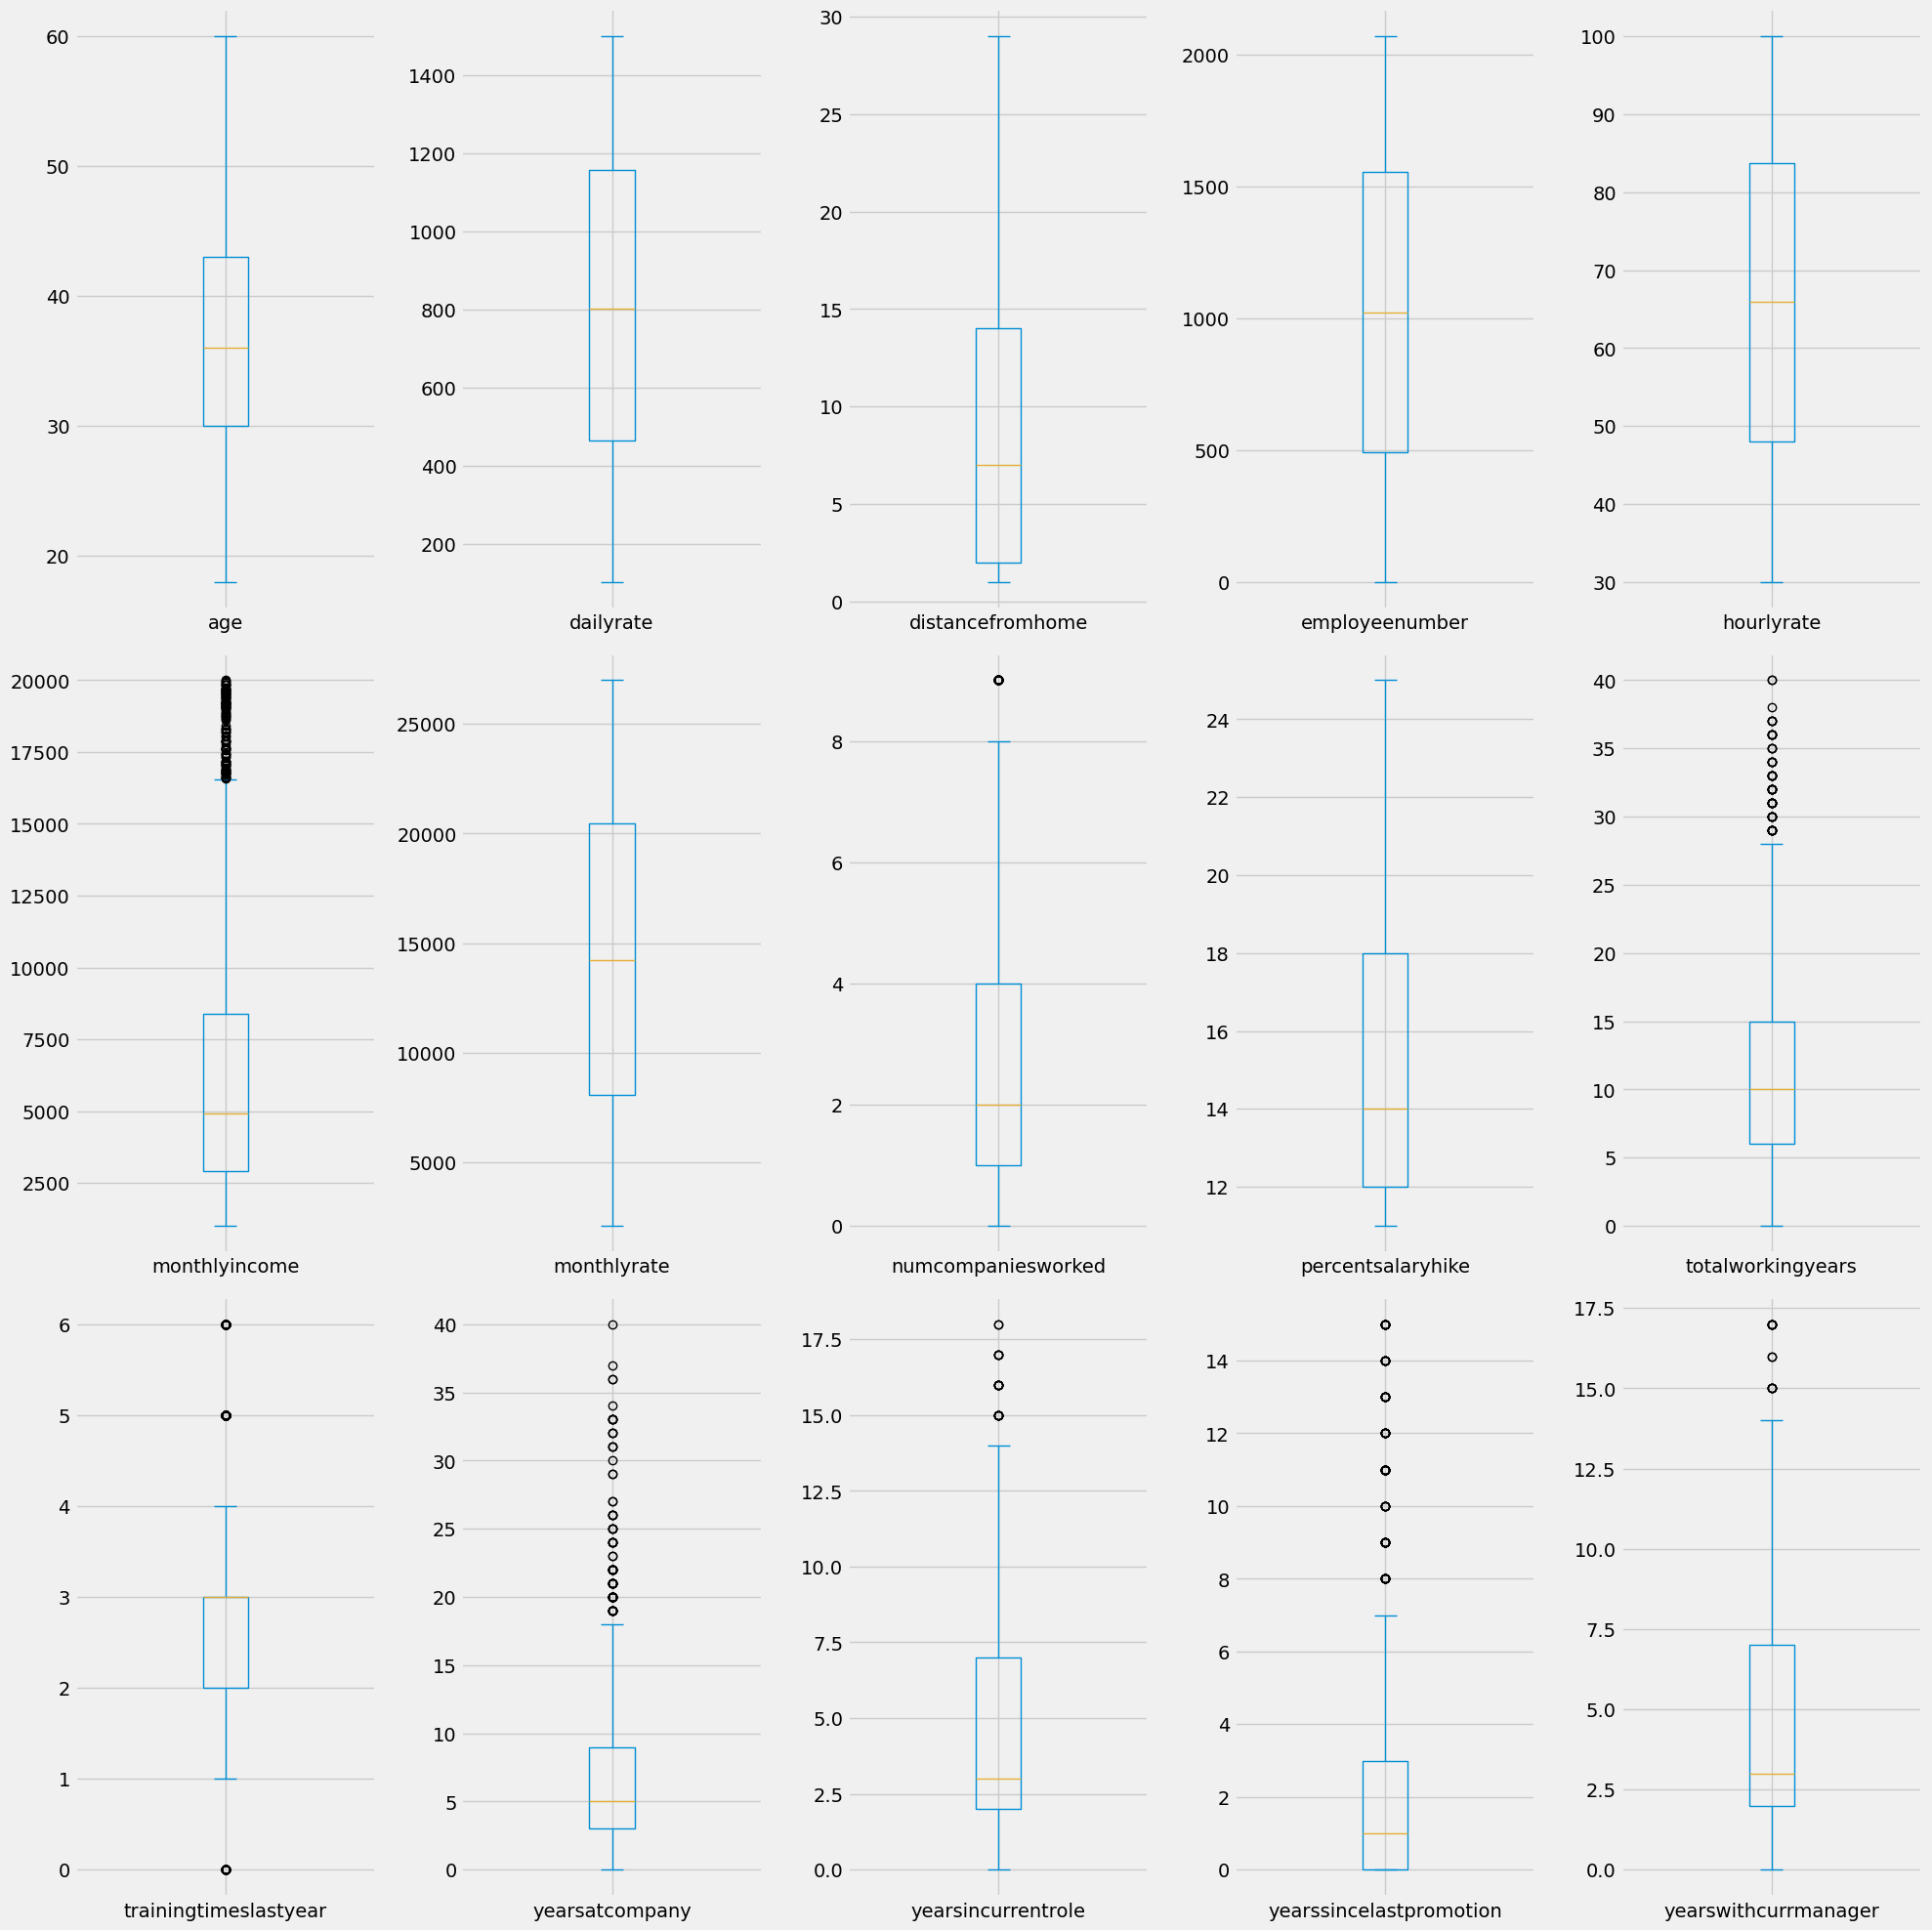

In [ ]:
# Check for outliers
# YOUR CODE HERE

# Check for outliers

df[numerical_features].plot(kind='box', subplots=True, layout=(3, 5), figsize=(20, 20))
plt.tight_layout()
plt.show()

###############################



### Handling outliers

**Exercise 4: Use lower bound as 25% and upper bound as 75% to handle the outliers [0.5 Mark]**

In [ ]:
# YOUR CODE HERE
def replace_outliers_with_bounds(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Replacing values below and above the bounds
    series = series.clip(lower=lower_bound, upper=upper_bound)
    return series
# Apply the function to each numerical column in the DataFrame
df[numerical_features] = df[numerical_features].apply(replace_outliers_with_bounds)






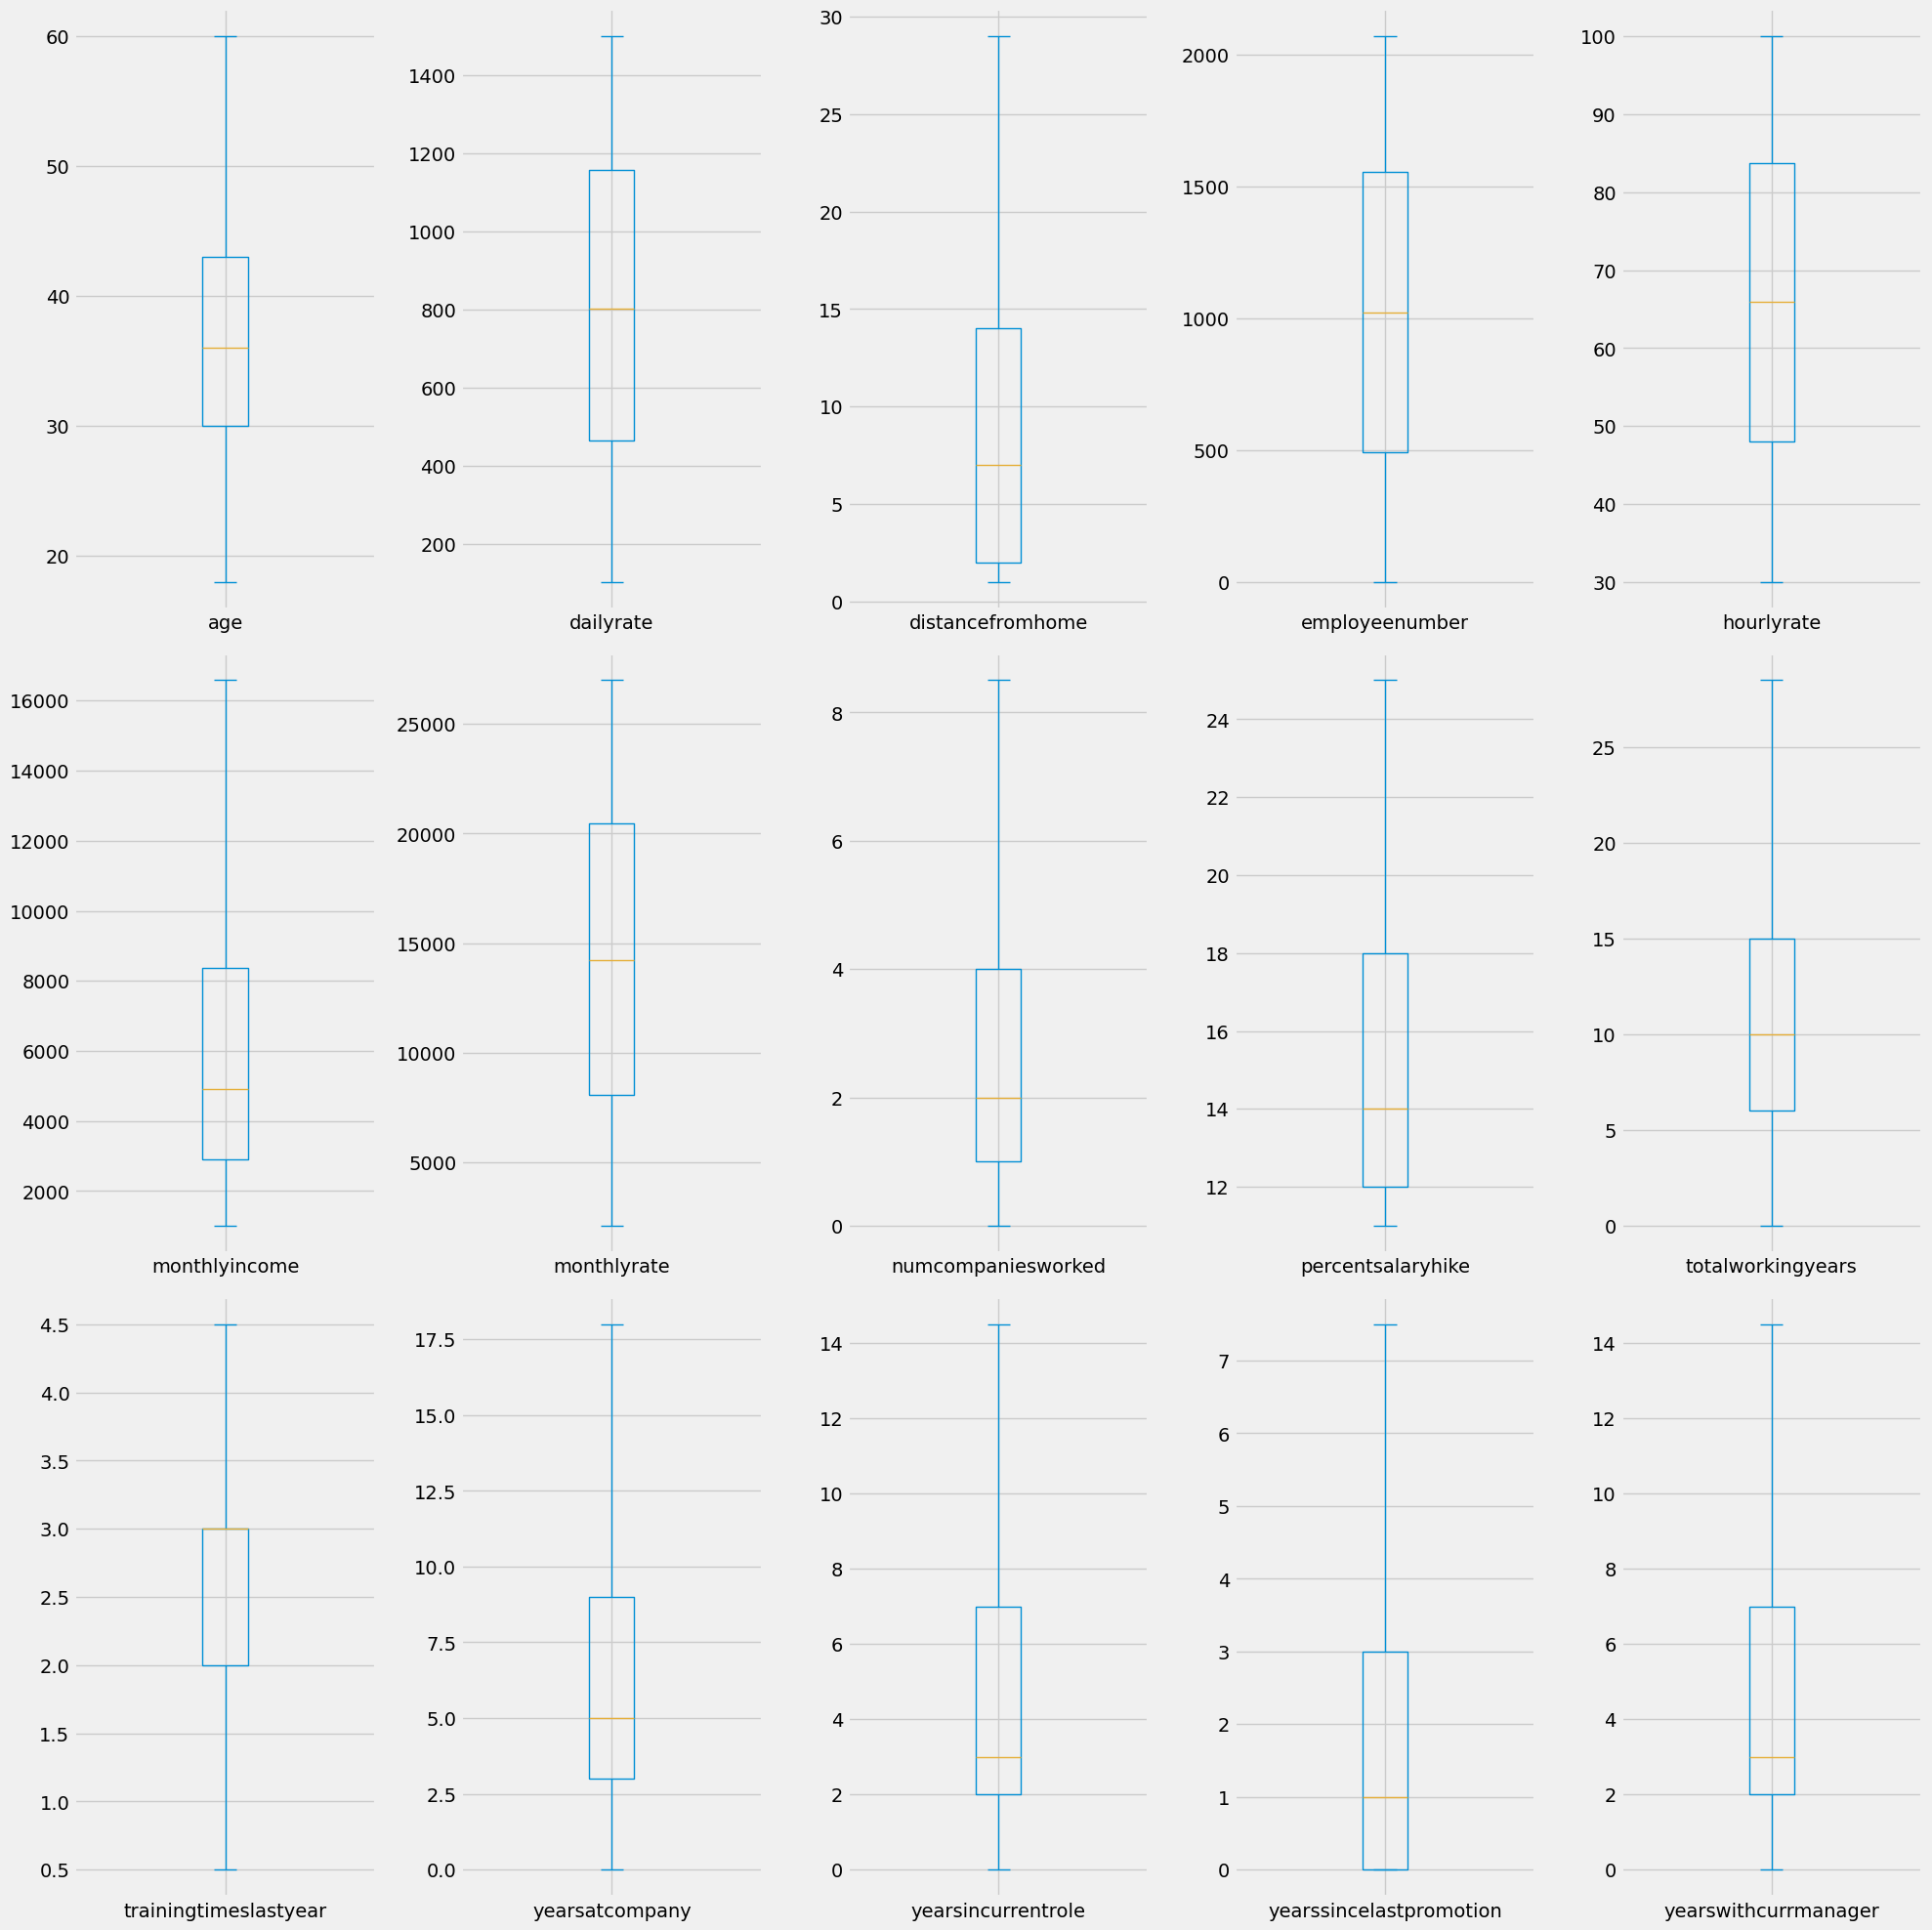

In [ ]:
# Recheck for outliers
# YOUR CODE HERE
df[numerical_features].plot(kind='box', subplots=True, layout=(3, 5), figsize=(20, 20))
plt.tight_layout()
plt.show()

### Target label imbalance

**Exercise 5: Check if there is an imbalance in target label [0.5 Mark]**

**Hint:** Use value_counts()

In [ ]:
# Count of unique values in Attrition column
# YOUR CODE HERE
df.attrition.value_counts()

No     1233
Yes     237
Name: attrition, dtype: int64

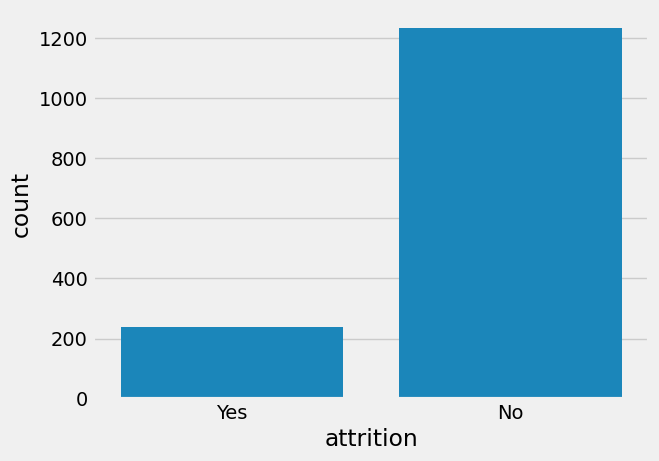

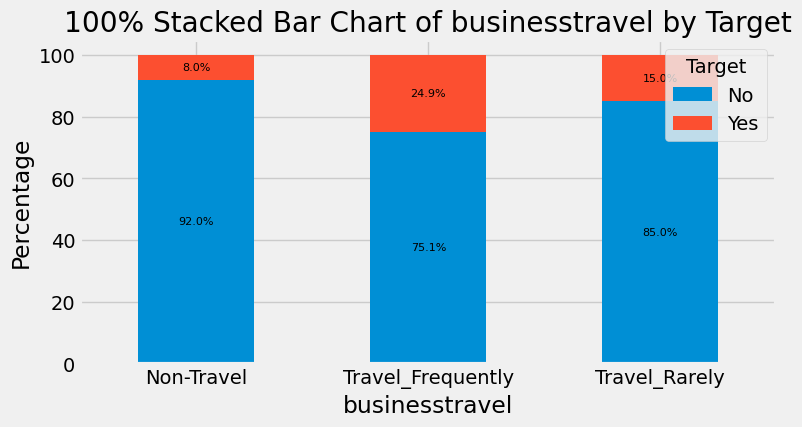

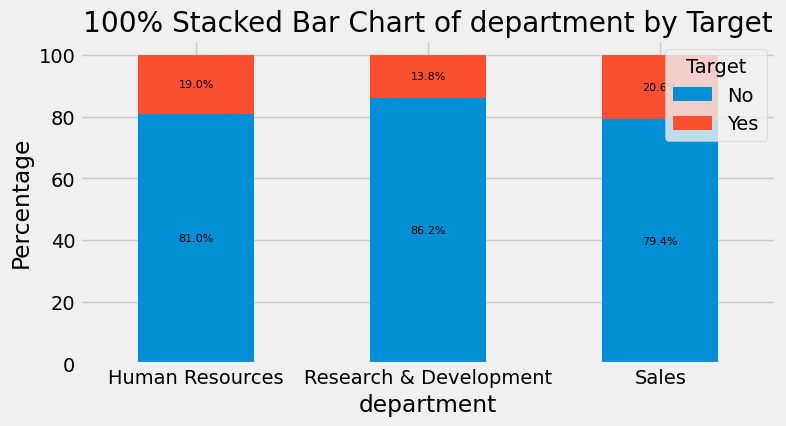

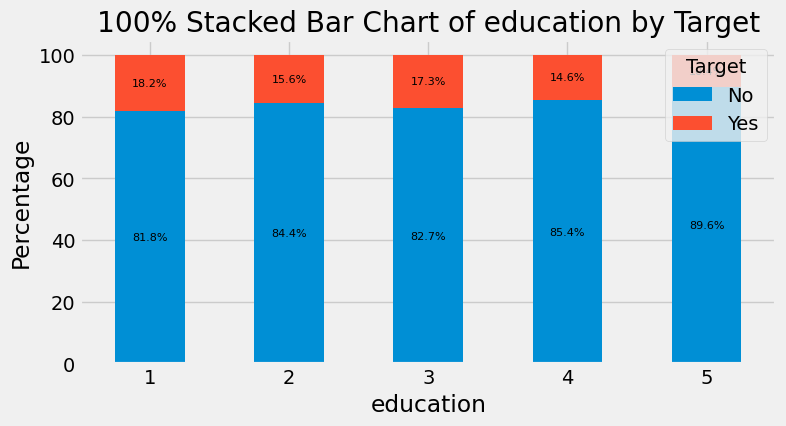

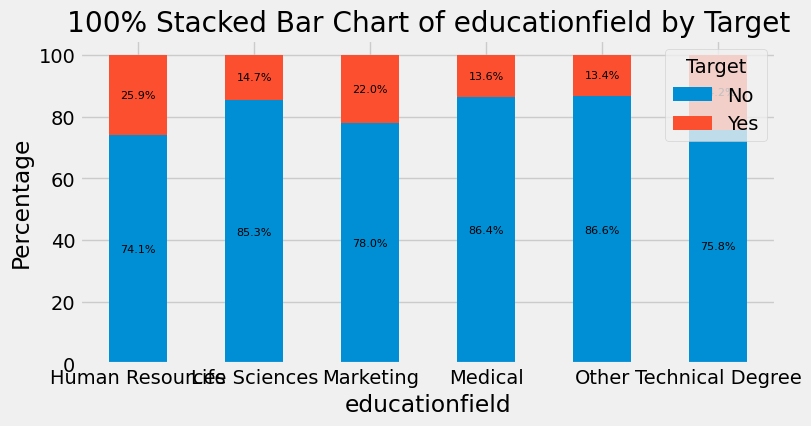

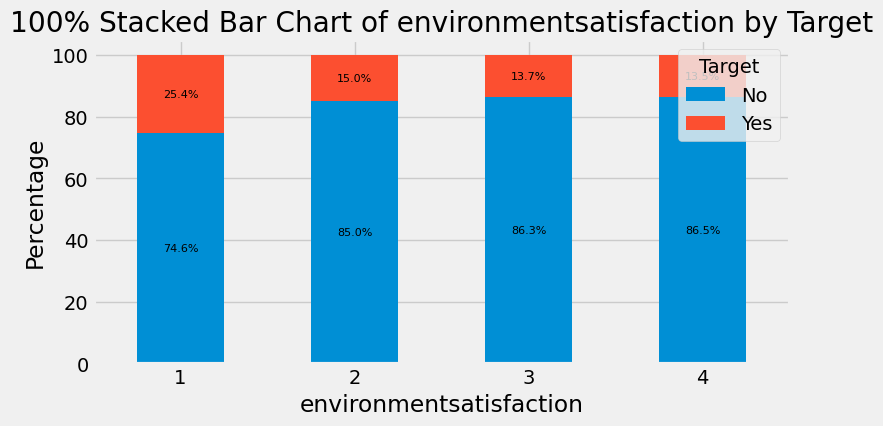

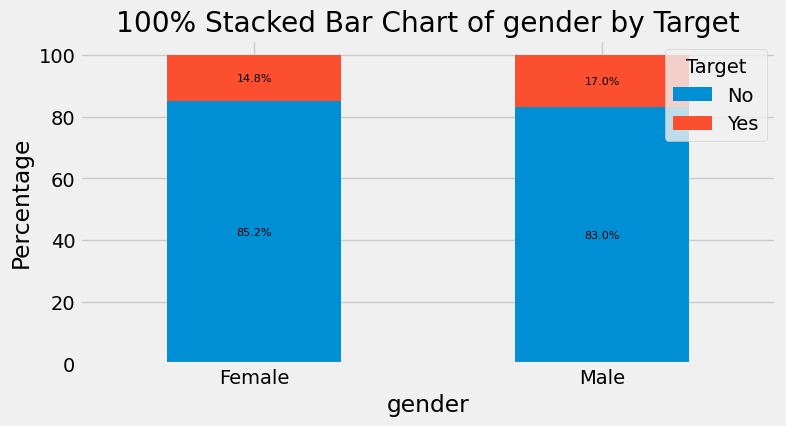

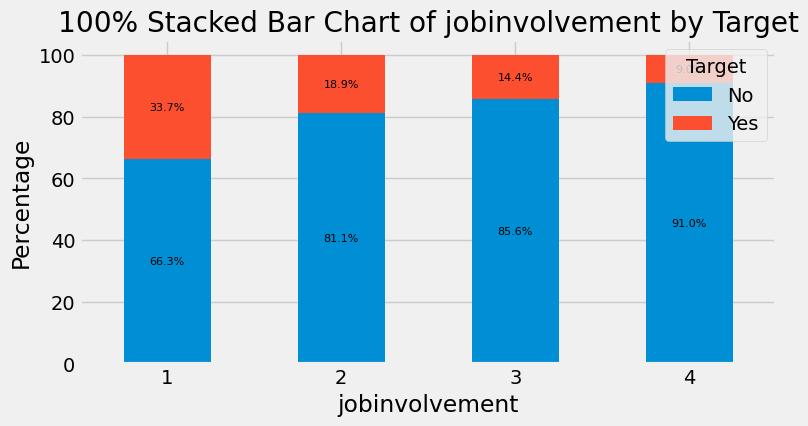

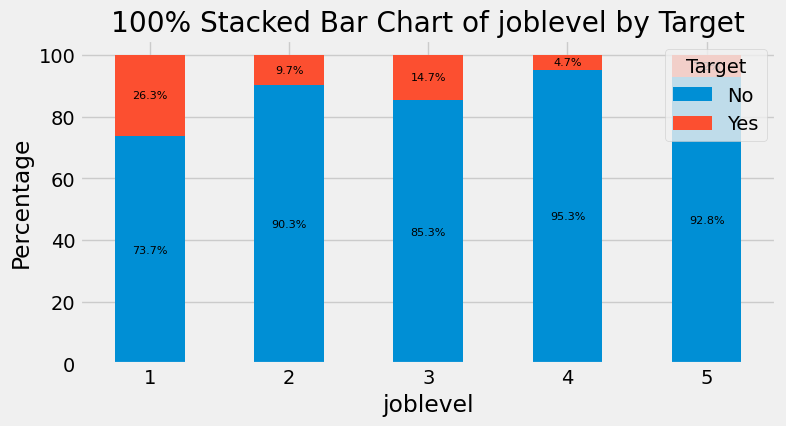

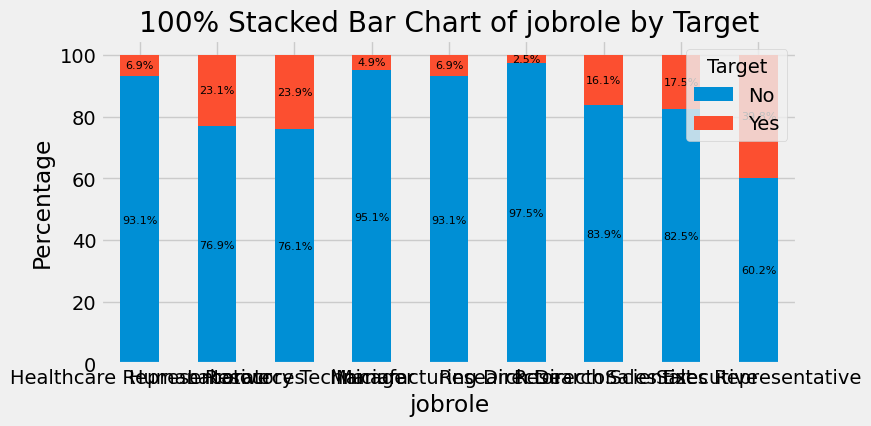

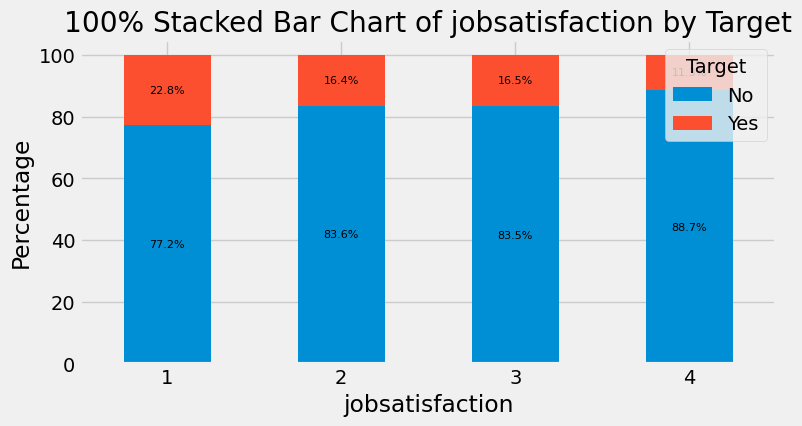

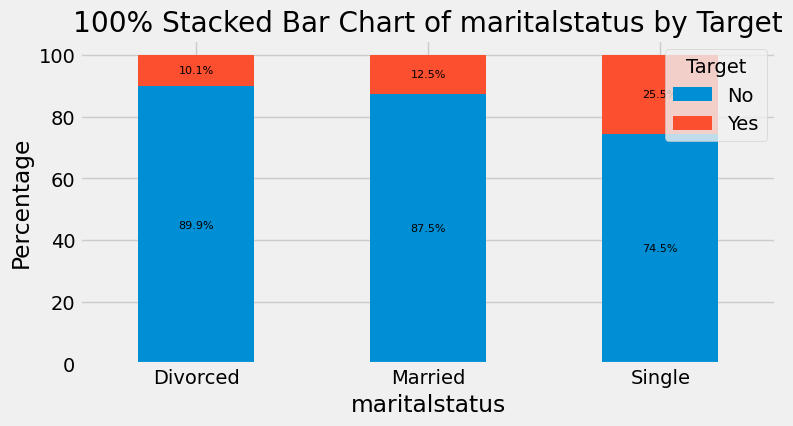

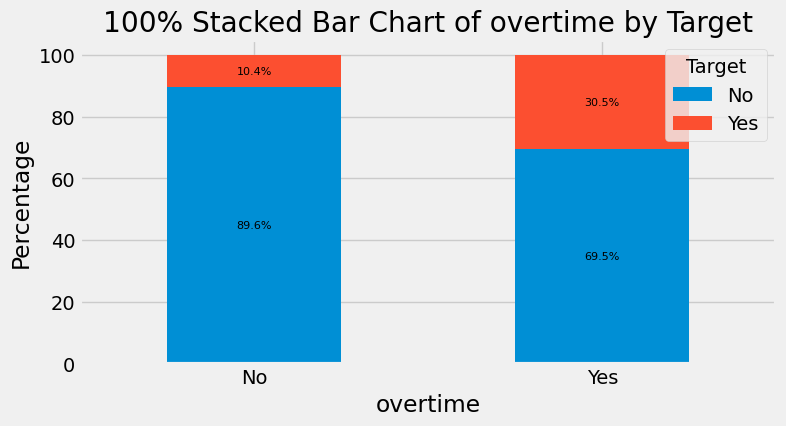

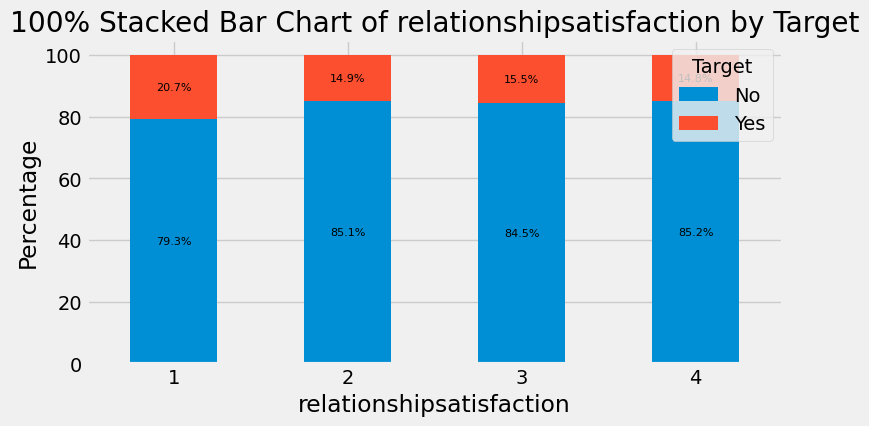

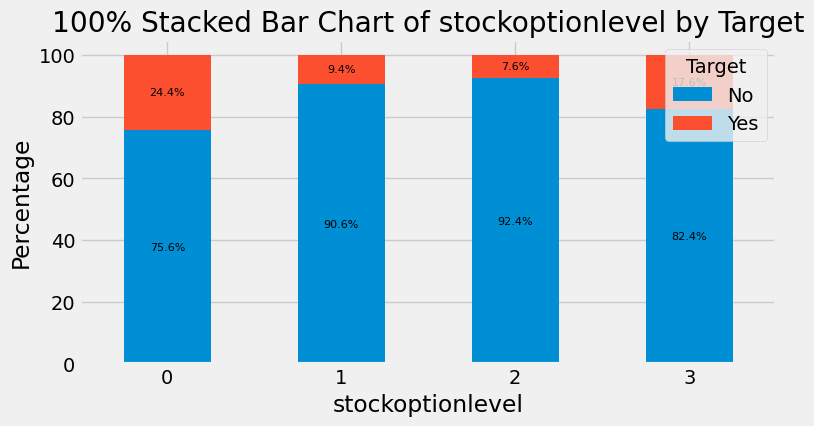

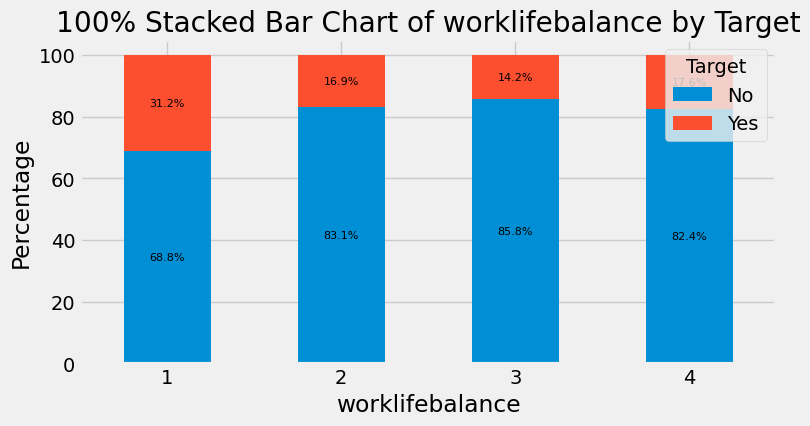

In [ ]:
# Plot barplot to visualize balance/imbalance
# YOUR CODE HERE
sns.countplot(x='attrition',data=df)
plt.show()

for col in categorical_features:
    # Create a cross-tabulation of counts
    crosstab = pd.crosstab(df[col], df['attrition'])

    # Convert counts to percentage of each column total (100% stacked bar)
    crosstab_percentage = crosstab.div(crosstab.sum(axis=1), axis=0) * 100

    # Create a stacked bar chart
    ax = crosstab_percentage.plot(kind='bar', stacked=True, figsize=(8, 4))

    # Setting the title and labels
    plt.title(f'100% Stacked Bar Chart of {col} by Target')
    plt.xlabel(col)
    plt.ylabel('Percentage')
    plt.xticks(rotation=0)  # Rotate the x-axis labels for better readability
    plt.legend(title='Target', loc='upper right')

    for rec in ax.patches:
        height = rec.get_height()
        y = rec.get_y() + height / 2
        x = rec.get_x() + rec.get_width() / 2
        label = f"{height:.1f}%"
        if height > 0:  # Only display labels for non-zero values
            ax.text(x, y, label, ha='center', va='center', fontsize=8, color='black')
    # Show plot
    plt.show()

If there is any imbalance in the dataset then a few techniques can be utilised (optional):
1. SMOTE
2. Cross Validation
3. Regularizing the model's parameters

###Plot pairplot

**Exercise 6: Visualize the relationships between the predictor variables and the target variable using a pairplot [0.5 Mark]**

**Hint:** Use sns.pairplot

In [ ]:
# Visualize a pairplot with relevant features
# YOUR CODE HERE

# sns.pairplot(df ,vars=numerical_features, hue ='attrition')

### Explore Correlation

- Plotting the Heatmap

**Exercise 7: Visualize the correlation among IBM employee attrition numerical features using a heatmap [0.5 Mark]**

In [ ]:
# Visualize heatmap
# YOUR CODE HERE
# corr_mat=round(df[numerical_features].corr(),2)
# plt.figure(figsize=(16,16))
# sns.heatmap(corr_mat,annot=True,cmap='coolwarm')
# plt.show()
#sns.heatmap(df[numerical_cols].corr())

Comment on the observations made with the pairplot and heatmap

# Part-B

### Preparing the test feature space
* Remove outliers if any
* Handle the categorical feature if required
* Other processing steps can also be followed.

In [ ]:
!pip install imbalanced-learn

In [ ]:
# Label encoding
from sklearn.preprocessing import LabelEncoder
def label_encoding(field: str, df: pd.DataFrame) -> LabelEncoder:
    label_encoder = LabelEncoder()
    df[field] = label_encoder.fit_transform(df[field])
    return label_encoder

object_columns = df.select_dtypes(include=['object']).columns
for field in object_columns:
    label_encoding(field, df)


In [ ]:
# Target Column
X, y = df.drop('attrition', axis=1), df['attrition']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
from imblearn.over_sampling import SMOTE

# # Assuming 'X' and 'y' are defined as your features and target

# sm = SMOTE(random_state=42)
# X_train, y_train = sm.fit_resample(X_train, y_train)

# # # Create a DataFrame from the resampled features
# # X_res_df = pd.DataFrame(X_res, columns=X.columns)

# # # Add the resampled target to this DataFrame
# # X_res_df['attrition'] = y_res

# # # Optional: Replace your original df with the balanced dataset
# # df = X_res_df

In [ ]:
print(X_train.shape)

(1029, 30)


In [ ]:
# # Plot barplot to visualize balance/imbalance
# attrition_counts = df['attrition'].value_counts()

# # Plot the bar chart
# attrition_counts.plot(kind='bar')

# plt.title('Attrition Counts')
# plt.xlabel('Attrition')
# plt.ylabel('Counts')
# plt.xticks(rotation=0)  # Rotate x-axis labels to show them horizontally
# plt.show()


Optional:
Use `Hyperopt`, a hyperparameter tuning technique to identify the best set of parameters.

In the notebook, data processing is done separately for different models.
Considering the fact that different models may require data in different format and in turn different processes may be followed to process the data.

If the processing steps followed for the models are same, data processing can also be done once.

## Apply CatBoost

Catboost was released in 2017 by Yandex, showing, by their benchmark to be faster in prediction, better in accuracy, and easier to use for categorical data across a series of GBDT tasks. Additional capabilities of catboost include plotting feature interactions and object (row) importance.

[Here](https://catboost.ai/en/docs/) is the official documentation of CatBoost

### Data Processing for CatBoost

**Exercise 8: Data processing for CatBoost [1 Mark]**
* **Copy the dataframe that was created after removing the outliers**
* **Handle the categorical features if required**
* **Create target column and feature space**

**Hint:** Column containing the information on attrition will be the target column.

In [ ]:
df.shape

(1470, 31)

In [ ]:
# Feature Space


### Model Definition

**Exercise 9: Define, train the model and display the results [2 Mark]**

**Hint:**
* Use CatBoostClassifier() to define the model with relevant parameters.
* Use `fit` to fit the data to the model. Refer [here](https://catboost.ai/en/docs/concepts/speed-up-training) to see some ways to speedup CatBoost training.
* Evaluate the model using roc_auc_score, accuracy_score, f1_score, predict methods or other relevant techniques.

In [ ]:
# Create CatBoost model
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, classification_report


# Initialize and fit the CatBoost model
cat_model = CatBoostClassifier(
    iterations=100,
    learning_rate=0.1,
    max_depth=3,
    verbose=False,  # Set to True if you want to see training logs
    random_seed=42
)
cat_model.fit(X_train, y_train)

In [ ]:
print(*sorted(zip(cat_model.feature_importances_, X_train.columns), reverse=True), sep='\n')

(12.005412938103914, 'overtime')
(7.58270015404225, 'monthlyincome')
(5.561667448406865, 'age')
(5.288033418822253, 'numcompaniesworked')
(5.2673817175554065, 'stockoptionlevel')
(4.699343263621565, 'jobrole')
(4.302226626185423, 'environmentsatisfaction')
(4.154451964819812, 'maritalstatus')
(4.037349328256224, 'jobinvolvement')
(3.6959596469055107, 'joblevel')
(3.6558321892661887, 'yearswithcurrmanager')
(3.6173072037736294, 'distancefromhome')
(3.51459378991577, 'yearsincurrentrole')
(3.284436571718306, 'yearssincelastpromotion')
(3.08864402863157, 'jobsatisfaction')
(2.9217790316586667, 'businesstravel')
(2.600695969476135, 'educationfield')
(2.5676280153704085, 'trainingtimeslastyear')
(2.266428267027578, 'totalworkingyears')
(2.2374985506167273, 'department')
(1.9469515170890854, 'employeenumber')
(1.9346953580449966, 'yearsatcompany')
(1.8723128496010495, 'relationshipsatisfaction')
(1.6595535577811522, 'dailyrate')
(1.5763668090377043, 'worklifebalance')
(1.5130150963335178, 'm

In [ ]:
# Feature Importance
from sklearn.inspection import permutation_importance
r = permutation_importance(cat_model, X_train, y_train,
                           n_repeats=20,
                           random_state=0)

feature_info = [[X_train.columns[i], r.importances_mean[i] * 1000, r.importances_mean[i] -  2 * r.importances_std[i]] for i in r.importances_mean.argsort()[::-1]]
feature_info.sort(key = lambda x: [-x[1], -x[2]])
# positive_features = [feature for feature, error in feature_info if error > 0 ]
print(*feature_info, sep='\n')
# print(positive_features)


['overtime', 37.2691933916424, 0.02739149397993968]
['monthlyincome', 16.61807580174931, 0.012190170748340376]
['numcompaniesworked', 14.042759961127338, 0.006453246389438556]
['age', 13.994169096209935, 0.007744242880150225]
['stockoptionlevel', 10.93294460641403, 0.0043453421457406195]
['environmentsatisfaction', 10.398445092322683, 0.005001576918594851]
['yearssincelastpromotion', 10.009718172983517, 0.0026060264510240063]
['maritalstatus', 9.329446064139985, 0.003992408078621654]
['distancefromhome', 8.06608357628769, 0.0030690145258766358]
['yearswithcurrmanager', 7.337220602526767, 0.002325996857394103]
['jobinvolvement', 5.733722060252716, 0.002262279669680946]
['employeenumber', 4.5189504373178195, 0.002116772187695205]
['yearsatcompany', 4.227405247813454, 0.0009018583805114402]
['department', 4.227405247813443, -0.00046457053627728135]
['jobrole', 3.8872691933916736, 0.0002510618204334971]
['joblevel', 3.4985422740525074, -0.0003101881326074518]
['relationshipsatisfaction', 3

In [ ]:
# Model training
# YOUR CODE HERE

### Model performance

In [ ]:
# Model performance on all sets

y_pred_catboost = cat_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_catboost)
print(classification_report(y_test, y_pred_catboost))
print('accuracy: ', accuracy)

              precision    recall  f1-score   support

           0       0.88      0.98      0.93       380
           1       0.67      0.20      0.30        61

    accuracy                           0.88       441
   macro avg       0.78      0.59      0.62       441
weighted avg       0.85      0.88      0.84       441

accuracy:  0.8752834467120182


#### Hyperopt catboost

In [ ]:
import numpy as np
from sklearn.metrics import f1_score, classification_report
from sklearn.model_selection import train_test_split
from catboost import CatBoostClassifier
from hyperopt import hp, fmin, tpe, Trials, STATUS_OK

# Assume X and y are your dataset's features and target variable
# X, y = load_data()  # This function should load your data


# Define the hyperparameter space
space = {
    'iterations': hp.choice('iterations', range(100, 501, 100)),  # Expanded to more iterations
    'learning_rate': hp.loguniform('learning_rate', np.log(0.005), np.log(0.3)),
    'max_depth': hp.choice('max_depth', range(3, 16)),
    'l2_leaf_reg': hp.uniform('l2_leaf_reg', 0.1, 20),
    'random_strength': hp.uniform('random_strength', 0.1, 30),
    'border_count': hp.choice('border_count', [32, 64, 128, 255]),
    'bagging_temperature': hp.uniform('bagging_temperature', 0, 1),
    'class_weight_handling': hp.choice('class_weight_handling', [
        {'method': 'scale_pos_weight', 'value': hp.uniform('scale_pos_weight', 0.5, 10)},
        {'method': 'auto_class_weights', 'value': 'Balanced'},
        {'method': 'auto_class_weights', 'value': 'SqrtBalanced'}
    ])
}

# Define the objective function
def objective(params):
    class_weight_params = {}
    if params['class_weight_handling']['method'] == 'scale_pos_weight':
        class_weight_params['scale_pos_weight'] = params['class_weight_handling']['value']
    else:
        class_weight_params['auto_class_weights'] = params['class_weight_handling']['value']

    # Initialize CatBoostClassifier with resolved class weight parameters
    cat_model = CatBoostClassifier(
        verbose=False,
        random_seed=42,
        iterations=params['iterations'],
        learning_rate=params['learning_rate'],
        max_depth=params['max_depth'],
        l2_leaf_reg=params['l2_leaf_reg'],
        random_strength=params['random_strength'],
        border_count=params['border_count'],
        bagging_temperature=params['bagging_temperature'],
        **class_weight_params
    )
    cat_model.fit(X_train, y_train)
    preds = cat_model.predict(X_test)
    f1 = f1_score(y_test, preds, pos_label=1)  # Assuming '1' is the minority class
    return {'loss': -f1, 'status': STATUS_OK}

# Run the optimization
trials = Trials()
best = fmin(
    fn=objective,
    space=space,
    algo=tpe.suggest,
    max_evals=20,
    trials=trials
)


100%|██████████| 20/20 [28:46<00:00, 86.33s/trial, best loss: -0.28125] 


KeyError: 'auto_class_weights'

In [ ]:
# Assuming 'best' is the dictionary returned by Hyperopt
best_params = {
    'iterations': [100, 200, 300, 400, 500][best['iterations']],
    'learning_rate': best['learning_rate'],
    'max_depth': list(range(3, 16))[best['max_depth']],
    'l2_leaf_reg': best['l2_leaf_reg'],
    'random_strength': best['random_strength'],
    'border_count': [32, 64, 128, 255][best['border_count']],
    'bagging_temperature': best['bagging_temperature']
}

# Handling 'class_weight_handling' which includes nested parameter choices
class_weight_handling = best['class_weight_handling']
if isinstance(class_weight_handling, dict):  # Check if the value is a dictionary
    if 'value' in class_weight_handling:  # Further check for 'value' key
        method = class_weight_handling['method']
        if method == 'scale_pos_weight':
            best_params['scale_pos_weight'] = class_weight_handling['value']
        elif method == 'auto_class_weights':
            best_params['auto_class_weights'] = class_weight_handling['value']

print("Best hyperparameters:", best_params)

# Initialize and fit the CatBoost model with the best parameters
cat_model = CatBoostClassifier(
    verbose=False,
    random_seed=42,
    **best_params
)
cat_model.fit(X_train, y_train)

# Predictions and evaluation
preds = cat_model.predict(X_test)
print("F1-Score:", f1_score(y_test, preds, average='macro'))
print("Classification Report:\n", classification_report(y_test, preds))


Best hyperparameters: {'iterations': 300, 'learning_rate': 0.06308849466790943, 'max_depth': 4, 'l2_leaf_reg': 19.509060240727788, 'random_strength': 29.859848115751568, 'border_count': 128, 'bagging_temperature': 0.9362592276465316}
F1-Score: 0.4903284671532847
Classification Report:
               precision    recall  f1-score   support

           0       0.87      1.00      0.93       255
           1       1.00      0.03      0.05        39

    accuracy                           0.87       294
   macro avg       0.94      0.51      0.49       294
weighted avg       0.89      0.87      0.81       294



## Apply XGBoost

XGBoost is a workhorse gradient boosted decision tree algorithm. Its been around since 2014 and has come to dominate the Kaggle and data science community. XGB introduced gradient boosting where new models are fit to the residuals of prior models and then added together, using a gradient descent algorithm to minimize the loss.

Read [here](https://xgboost.readthedocs.io/en/stable/parameter.html) on XGBoost parameters.

Refer [here](https://xgboost.readthedocs.io/en/stable/python/python_api.html#xgboost.XGBClassifier) for the official documentation of XGBoost classifier.

### Data Processing for XGBoost


**Exercise 10: Data Processing for XGBoost [1 Mark]**
* **Copy the dataframe after the outliers were removed.**
* **Handle the categorical features if required**
* **Create target column and feature space**

In [ ]:
# Copy dataframe

# X, y = df.drop('attrition', axis=1), df['attrition']
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Hint:** Use pd.get_dummies

In [ ]:
# Handling categorical features
# YOUR CODE HERE

In [ ]:
# Concat the dummy variables to actual dataframe and remove initial categorical columns
# YOUR CODE HERE

When creating the dummy variables, the name of attrition column was changed, rename to 'attrition' again.

**Hint:** Use .rename

In [ ]:
# Rename target column
# YOUR CODE HERE

### Model Definition

**Exercise 11: Define, train the model and display the results [2 Mark]**

**Hint:**
* Use XGBClassifier() to define the model with relevant parameters.
* Use `fit` to fit the data to the model.
* Evaluate the model using roc_auc_score, accuracy_score, f1_score, predict methods or other relevant techniques.

In [ ]:
# Create XGBoost classifier model
from xgboost import XGBClassifier

# Initialize and fit XGBoost model
xgb_model = XGBClassifier(n_estimators=100,
                          objective='binary:logistic',  # Use 'multi:softprob' for multi-class
                          max_depth=3,
                          learning_rate=0.1,
                          categorical_features=categorical_features,
                          use_label_encoder=True,
                          enable_categorical=True,
                          eval_metric='logloss',  # Use 'logloss' for binary classification, 'mlogloss' for multiclass
                          verbosity=0,
                          scale_pos_weight=(y_train == 0).sum() / (y_train == 1).sum()  # Adjusting for imbalance
                          )  # verbosity=0 to silence the default output, change as needed


In [ ]:
# Model training
xgb_model.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              categorical_features=['businesstravel', 'department', 'education',
                                    'educationfield', 'environmentsatisfaction',
                                    'gender', 'jobinvolvement', 'joblevel',
                                    'jobrole', 'jobsatisfaction',
                                    'maritalstatus', 'overtime',
                                    'relationshipsatisfaction',
                                    'stockoptionlevel', 'worklifebalance'],
              colsample_bylevel=None, colsa...
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, ...)

### Model Performance

In [ ]:
# Model performance on all sets
from sklearn.metrics import accuracy_score, classification_report

y_pred_xgboost = xgb_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_xgboost)
print(classification_report(y_test, y_pred_xgboost))
print('accuracy', accuracy)

              precision    recall  f1-score   support

           0       0.92      0.89      0.91       380
           1       0.45      0.54      0.49        61

    accuracy                           0.85       441
   macro avg       0.69      0.72      0.70       441
weighted avg       0.86      0.85      0.85       441

accuracy 0.8458049886621315


In [ ]:
scale_pos_weight = 5


In [ ]:
from xgboost import XGBClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split



params =  {'n_estimators': 250, 'max_depth': 3, 'learning_rate': 0.06159995537474111, 'gamma': 0.18536058115423548, 'subsample': 0.7764241200346444, 'colsample_bytree': 0.6011639184016377, 'min_child_weight': 1, 'reg_alpha': 0.28587258496091617, 'reg_lambda': 2.336824490308373, 'scale_pos_weight': 6.14978911485693}

# Initialize XGBoost with the best parameters
xgb_model = XGBClassifier(
    **params,
    use_label_encoder=False,
    objective='binary:logistic',
    eval_metric='logloss'   # Evaluation metric for validation data
)

# Fit model on training data
xgb_model.fit(X_train, y_train)

# Predictions and evaluation on the test data
y_pred = xgb_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(classification_report(y_test, y_pred))
print('Accuracy:', accuracy)

              precision    recall  f1-score   support

           0       0.92      0.89      0.91       380
           1       0.43      0.51      0.47        61

    accuracy                           0.84       441
   macro avg       0.67      0.70      0.69       441
weighted avg       0.85      0.84      0.84       441

Accuracy: 0.8390022675736961


In [ ]:
!pip install hyperopt

In [ ]:
from hyperopt import hp, fmin, tpe, Trials, STATUS_OK
from xgboost import XGBClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import accuracy_score, classification_report, f1_score, roc_auc_score
from sklearn.model_selection import train_test_split
import numpy as np

# Expanding the hyperparameter space
space = {
    'n_estimators': hp.choice('n_estimators', range(100, 401, 50)),  # Broader and more choices
    'max_depth': hp.choice('max_depth', range(3, 11)),  # Larger depth range
    'learning_rate': hp.loguniform('learning_rate', np.log(0.01), np.log(0.2)),  # Using loguniform for learning rate
    'gamma': hp.uniform('gamma', 0, 0.5),  # Wider range for gamma
    'subsample': hp.uniform('subsample', 0.5, 1.0),  # Full range for subsampling
    'colsample_bytree': hp.uniform('colsample_bytree', 0.5, 1.0),  # Full range for column sampling
    'min_child_weight': hp.choice('min_child_weight', range(1, 10)),  # Including min_child_weight in the search
    'reg_alpha': hp.uniform('reg_alpha', 0, 1),  # L1 regularization
    'reg_lambda': hp.uniform('reg_lambda', 1, 5),  # L2 regularization
    'scale_pos_weight': hp.uniform('scale_pos_weight', 1, 10)  # Adjusted range for scale_pos_weight
}

def objective(params):
    xgb_model = XGBClassifier(
        categorical_features=categorical_features,
        use_label_encoder=True,
        enable_categorical=True,
        eval_metric='logloss',
        verbosity=0,
        **params
    )
    # Fit the model on the training data
    xgb_model.fit(X_train, y_train)

    # Predict the probabilities of the positive class
    pred_probs = xgb_model.predict_proba(X_test)[:, 1]

    # Calculate the F1 score using the predicted class labels
    pred_labels = xgb_model.predict(X_test)
    f1 = f1_score(y_test, pred_labels)

    # Calculate the ROC AUC score using the predicted probabilities
    roc_auc = roc_auc_score(y_test, pred_probs)

    # You can return both scores or combine them depending on your optimization goal
    return {
        'loss': -(f1 * 100) -roc_auc,  # Minimize negative ROC AUC to maximize ROC AUC
        'status': STATUS_OK,
        'other_stats': {'f1_score': f1, 'roc_auc_score': roc_auc}
    }

trials = Trials()
best = fmin(
    fn=objective,
    space=space,
    algo=tpe.suggest,
    max_evals=100,  # You can adjust this number based on how long you're willing to wait
    trials=trials
)

print("Best hyperparameters:", best)



100%|██████████| 100/100 [00:39<00:00,  2.55trial/s, best loss: -53.18867455524057]
Best hyperparameters: {'colsample_bytree': 0.6106341572383193, 'gamma': 0.25091443150743875, 'learning_rate': 0.0652027252269165, 'max_depth': 0, 'min_child_weight': 3, 'n_estimators': 4, 'reg_alpha': 0.40754242281235487, 'reg_lambda': 2.4484326600295003, 'scale_pos_weight': 4.140386479779496, 'subsample': 0.8608955642167104}


In [ ]:

# Decode the 'best' indexes to actual parameter values
# Assuming 'best' is your result dictionary from Hyperopt
# Decoding 'best' hyperparameters from Hyperopt's output
best_params = {
    'n_estimators': range(100, 401, 50)[best['n_estimators']],
    'max_depth': range(3, 11)[best['max_depth']],
    'learning_rate': best['learning_rate'],  # Using directly the value sampled by Hyperopt
    'gamma': best['gamma'],  # Directly using the best as these are sampled from a continuous space
    'subsample': best['subsample'],  # Directly using the best as these are sampled from a continuous space
    'colsample_bytree': best['colsample_bytree'],  # Directly using the best as these are sampled from a continuous space
    'min_child_weight': range(1, 10)[best['min_child_weight']],
    'reg_alpha': best['reg_alpha'],  # Directly using the best as this is sampled from a continuous space
    'reg_lambda': best['reg_lambda'],  # Directly using the best as this is sampled from a continuous space
    'scale_pos_weight': best['scale_pos_weight']  # Directly using the best as this is sampled from a continuous space
}

print("Best parameters decoded:", best_params)


# Train and evaluate the model as before
best_xgb_model = XGBClassifier(
    **best_params,
    categorical_features=categorical_features,
    use_label_encoder=True,
    enable_categorical=True,
    eval_metric='logloss',
)
best_xgb_model.fit(X_train, y_train)

# Predictions and evaluation
best_y_pred = best_xgb_model.predict(X_test)
best_accuracy = accuracy_score(y_test, best_y_pred)
best_report = classification_report(y_test, best_y_pred, target_names=['0', '1'])

print(best_report)
print('Accuracy:', best_accuracy)

Best parameters decoded: {'n_estimators': 300, 'max_depth': 3, 'learning_rate': 0.0652027252269165, 'gamma': 0.25091443150743875, 'subsample': 0.8608955642167104, 'colsample_bytree': 0.6106341572383193, 'min_child_weight': 4, 'reg_alpha': 0.40754242281235487, 'reg_lambda': 2.4484326600295003, 'scale_pos_weight': 4.140386479779496}
              precision    recall  f1-score   support

           0       0.93      0.92      0.92       380
           1       0.51      0.54      0.52        61

    accuracy                           0.86       441
   macro avg       0.72      0.73      0.72       441
weighted avg       0.87      0.86      0.87       441

Accuracy: 0.8639455782312925


#### Random hyperparameter tuning

In [ ]:
import numpy as np
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.metrics import classification_report
from xgboost import XGBClassifier

# Assume X_train, X_test, y_train, y_test are already defined from your data

# Expanded parameter grid
param_dist = {
    'max_depth': range(2, 11),  # Wider range for maximum depth
    'min_child_weight': range(1, 10),  # Increased range for minimum sum of instance weight needed in a child
    'subsample': np.linspace(0.5, 1.0, 20),  # Wider and more granular range for subsample ratio
    'colsample_bytree': np.linspace(0.4, 1.0, 20),  # Wider and more granular range for colsample ratio
    'learning_rate': np.linspace(0.01, 0.15, 20),  # Wider range for learning rate
    'gamma': np.linspace(0, 0.5, 20),  # Wider and more granular range for gamma
    'lambda': np.logspace(-1, 2, 20),  # Wider range for L2 regularization
    'alpha': np.logspace(-1, 2, 20),  # Wider range for L1 regularization
    'n_estimators': range(100, 501, 50),  # Wider range for number of trees
    'scale_pos_weight': np.linspace(1, 10, 20)  # Wider range for scale_pos_weight to address class imbalance
}

# Initialize the XGBClassifier
xgb = XGBClassifier(
    categorical_features=categorical_features,
    use_label_encoder=True,
    enable_categorical=True,
    eval_metric='logloss')

# Setup RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_dist,
    n_iter=200,  # Increased number of iterations for a more thorough search
    scoring='f1_macro',
    cv=50,  # Increased the number of folds for better generalization performance evaluation
    verbose=2,
    random_state=42,
    n_jobs=-1
)

# Perform Random Search
random_search.fit(X_train, y_train)

# Print the best parameters found
print("Best parameters:", random_search.best_params_)

# Best model
best_xgb = random_search.best_estimator_

# Evaluate the best model
best_xgb.fit(X_train, y_train)
predictions = best_xgb.predict(X_test)
print("Evaluation on Test Data:")
print(classification_report(y_test, predictions))


Fitting 50 folds for each of 200 candidates, totalling 10000 fits
Best parameters: {'subsample': 0.868421052631579, 'scale_pos_weight': 4.315789473684211, 'n_estimators': 400, 'min_child_weight': 6, 'max_depth': 5, 'learning_rate': 0.06894736842105262, 'lambda': 48.32930238571752, 'gamma': 0.18421052631578946, 'colsample_bytree': 0.6210526315789474, 'alpha': 5.455594781168517}
Evaluation on Test Data:
              precision    recall  f1-score   support

           0       0.92      0.90      0.91       380
           1       0.45      0.52      0.48        61

    accuracy                           0.85       441
   macro avg       0.69      0.71      0.70       441
weighted avg       0.86      0.85      0.85       441



In [ ]:

p_prams = best_params

p_prams['min_child_weight'] = int(p_prams['min_child_weight'])
p_prams['n_estimators'] = int(p_prams['n_estimators'])

# Train the model with the best parameters
best_model = XGBClassifier(
    **p_prams,
    use_label_encoder=False,
    eval_metric='logloss',
    verbosity=0,
)
best_model.fit(X_train, y_train)

# Evaluate the optimized model
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(classification_report(y_test, y_pred))
print(f"Optimized Accuracy: {accuracy:.5f}")


## Random Forest

In [ ]:
# Random forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE


# # Applying SMOTE
# smote = SMOTE(random_state=42)
# X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Initialize RandomForest with balanced class weights
clf = RandomForestClassifier(n_estimators=100, class_weight='balanced', max_depth=None, random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.88      0.96      0.92       380
           1       0.45      0.21      0.29        61

    accuracy                           0.85       441
   macro avg       0.67      0.59      0.60       441
weighted avg       0.82      0.85      0.83       441



## Apply LightGBM (Optional)

LightGBM is an open-source GBDT framework created by Microsoft as a fast and scalable alternative to XGB and GBM. By default LightGBM will train a Gradient Boosted Decision Tree (GBDT), but it also supports random forests, Dropouts meet Multiple Additive Regression Trees (DART), and Gradient Based One-Side Sampling (Goss).

To know more about LightGBM parameters, refer [here](https://lightgbm.readthedocs.io/en/latest/pythonapi/lightgbm.LGBMClassifier.html#lightgbm.LGBMClassifier).

### Feature Engineering for LightGBM

In [ ]:
## Following the same procedure as followed in XGBoost

# Copy the dataframe
# YOUR CODE HERE

# Handling categorical features
# YOUR CODE HERE

# Concat the dummy variables to actual dataframe and remove initial categorical columns
# YOUR CODE HERE

# Rename target column
# YOUR CODE HERE

# Features Space
# YOUR CODE HERE

# Target Label
# YOUR CODE HERE

### Model Definition

**Hint:**
* Use LGBMClassifier() to define the model with relevant parameters.
* Use `fit` to fit the data to the model.
* Evaluate the model using roc_auc_score, accuracy_score, f1_score, predict methods or other relevant techniques.

In [ ]:
# Create LightGBM classifier model
import lightgbm as lgb

# Initialize and fit the LightGBM model
lgb_model = lgb.LGBMClassifier(
    n_estimators=100,  # Corresponds to iterations in CatBoost
    learning_rate=0.1,
    max_depth=3,
    random_state=42,  # Equivalent to random_seed in CatBoost
    verbose=-1  # Set to 0 for more verbosity during training
)



In [ ]:
# Model training
lgb_model.fit(X_train, y_train)

# Predictions and Evaluation
y_pred = lgb_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Classification Report:\n", report)
print("Accuracy:", accuracy)

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.94      0.92       380
           1       0.47      0.33      0.38        61

    accuracy                           0.85       441
   macro avg       0.68      0.63      0.65       441
weighted avg       0.84      0.85      0.84       441

Accuracy: 0.854875283446712


### Model performance

In [ ]:
# Model performance on all sets
# YOUR CODE HERE

## Results

**Exercise 12: Create a dataframe of XGBoost results and CatBoost results and

*   List item
*   List item

display them [0.5 Mark]**

**Hint:** Use pd.DataFrame

In [ ]:
# Create a dataframe for computed metrics for different models

# XGBoost
y_pred_xgboost = xgb_model.predict(X_test)
xgb_accuracy = accuracy_score(y_test, y_pred_xgboost)
xgb_report = classification_report(y_test, y_pred_xgboost, output_dict=True)

# CatBoost
y_pred_catboost = cat_model.predict(X_test)
cat_accuracy = accuracy_score(y_test, y_pred_catboost)
cat_report = classification_report(y_test, y_pred_catboost, output_dict=True)


# Create a dictionary to hold your data
data = {
    'Model': ['XGBoost', 'CatBoost'],
    'Accuracy': [xgb_accuracy, cat_accuracy],
    'Precision': [xgb_report['weighted avg']['precision'], cat_report['weighted avg']['precision']],
    'Recall': [xgb_report['weighted avg']['recall'], cat_report['weighted avg']['recall']],
    'F1-Score': [xgb_report['weighted avg']['f1-score'], cat_report['weighted avg']['f1-score']]
}

# Convert dictionary into DataFrame
results_df = pd.DataFrame(data)

# Display the DataFrame
print(results_df)

      Model  Accuracy  Precision    Recall  F1-Score
0   XGBoost  0.823129   0.841075  0.823129  0.831068
1  CatBoost  0.891156   0.886068  0.891156  0.865254


Reference reading:
1. https://machinelearningmastery.com/xgboost-for-imbalanced-classification/